# 2021 TOKYO OLYMPICS DATA ANALYSIS AND VISUALIZATION USING MATPLOTLIB AND SEABORN LIBRARIES IN PYTHON

**The following is a visual exploration of the 2021 Tokyo Olympics Dataset found in Kaggle.**

https://www.kaggle.com/arjunprasadsarkhel/2021-olympics-in-tokyo

I use the Medals.xlsx and 'Athletes.xlsx' files in the dataset to explore the correlation of the number of athletes a country sends and the number of medals a country wins.

For the top 30 total medal winning countries, I also explore the correlation between Per Capita GDP and total medals won. I use the World Bank's GDP PER CAPITA Data for 2020.
I also supplement some missing data from the CIA World Factbook page.

https://data.worldbank.org/indicator/NY.GDP.PCAP.CD

https://www.cia.gov/the-world-factbook/field/real-gdp-per-capita/country-comparison

**This exploration attempts to answer the following questions.**

* **Which countries won the most medals?**
* **Which countries had the most Athlete Count?**
* **Is there a correlation between Athlete Count and the number of Medals a country wins?**
* **Amongst the top 30 medal winning countries, is there a correlation between Per Capita GDP and the number of Medals a country wins?**


## PREPARING AND CLEANING THE OLYMPIC DATA

**Import numpy, pandas, visualization libraries, scipy.stats and set %matplotlib inline.**

In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

**Read in the 'Medals.xlsx' excel file as a dataframe called 'tokyo_olympic_medals'**

In [155]:
!pip install openpyxl
tokyo_olympic_medals = pd.read_excel('Medals.xlsx')

/opt/anaconda3/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


**Check the info of the 'tokyo_olympic_medals' dataframe.**

In [156]:
tokyo_olympic_medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           93 non-null     int64 
 1   Team/NOC       93 non-null     object
 2   Gold           93 non-null     int64 
 3   Silver         93 non-null     int64 
 4   Bronze         93 non-null     int64 
 5   Total          93 non-null     int64 
 6   Rank by Total  93 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 5.2+ KB


**Check if any columns have any null values.**

In [157]:
tokyo_olympic_medals.isnull().any()

Rank             False
Team/NOC         False
Gold             False
Silver           False
Bronze           False
Total            False
Rank by Total    False
dtype: bool

**Check the first 10 rows of the dataframe.**

In [158]:
tokyo_olympic_medals.head(10)

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
5,6,Australia,17,7,22,46,6
6,7,Netherlands,10,12,14,36,9
7,8,France,10,12,11,33,10
8,9,Germany,10,11,16,37,8
9,10,Italy,10,10,20,40,7


**It looks as if the first column is an index we can delete. 
Set 'Team/NOC' as the index as it is more helpful to
have the participating countries as the index.**

In [159]:
tokyo_olympic_medals.set_index('Team/NOC').head()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
Team/NOC,,,,,,
United States of America,1,39,41,33,113,1
People's Republic of China,2,38,32,18,88,2
Japan,3,27,14,17,58,5
Great Britain,4,22,21,22,65,4
ROC,5,20,28,23,71,3


**Read in the 'Athletes.xlsx' excel file as a dataframe called 'tokyo_olympic_athletes'**

In [160]:
tokyo_olympic_athletes = pd.read_excel('Athletes.xlsx')

**Check the info of the tokyo_olympic_athletes dataframe.**

In [161]:
tokyo_olympic_athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11085 entries, 0 to 11084
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        11085 non-null  object
 1   NOC         11085 non-null  object
 2   Discipline  11085 non-null  object
dtypes: object(3)
memory usage: 259.9+ KB


**Check if any columns have any null values.**

In [162]:
tokyo_olympic_athletes.isnull().any()

Name          False
NOC           False
Discipline    False
dtype: bool

**Check the first five rows of the 'tokyo_olympic_athletes' dataframe.**

In [163]:
tokyo_olympic_athletes.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


**Since we are trying to get the number of unique athlete names from participating countries,
dropped any rows with duplicate athlete names using drop_duplicates().**

In [164]:
tokyo_olympic_athletes.drop_duplicates(subset=['Name'],inplace=True)

**Count the unique number of athletes for every participating country.
Make new dataframe called 'tokyo_olympic_athletes_count'.**

In [165]:
tokyo_olympic_athletes_count = tokyo_olympic_athletes.groupby(['NOC']).count()

**Check the first five rows of 'tokyo_olympic_athletes_count' dataframe.**

In [166]:
tokyo_olympic_athletes_count.head()

,Name,Discipline
NOC,,
Afghanistan,5,5
Albania,8,8
Algeria,41,41
American Samoa,5,5
Andorra,2,2


**Rename 'Name' column of 'tokyo_olympic_athletes_count' to 'Athlete Count'.**

In [167]:
tokyo_olympic_athletes_count.rename(columns={'Name':'Athlete Count'},inplace=True)

**Drop the 'Discipline' column of 'tokyo_olympic_athletes_count' as we won't need the information for analysis.**

In [168]:
tokyo_olympic_athletes_count.drop(columns='Discipline',inplace=True)

**Since 'tokyo_olympic_athletes_count' dataframe is all set, left join 'tokyo_olympic_medals' dataframe with it on the 'NOC' column using join().**

**Make new dataframe called 'tokyo_olympics_ath_count_medal'.**

In [169]:
tokyo_olympics_ath_count_medal = tokyo_olympic_athletes_count.join(tokyo_olympic_medals.set_index('Team/NOC'), on='NOC')

**Check 'tokyo_olympics_ath_count_medal' info**

In [170]:
tokyo_olympics_ath_count_medal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, Afghanistan to Zimbabwe
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Athlete Count  206 non-null    int64  
 1   Rank           93 non-null     float64
 2   Gold           93 non-null     float64
 3   Silver         93 non-null     float64
 4   Bronze         93 non-null     float64
 5   Total          93 non-null     float64
 6   Rank by Total  93 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 12.9+ KB


**Check the first five rows of 'tokyo_olympics_ath_count_medal'**

In [171]:
tokyo_olympics_ath_count_medal.head()

,Athlete Count,Rank,Gold,Silver,Bronze,Total,Rank by Total
NOC,,,,,,,
Afghanistan,5,NaN,NaN,NaN,NaN,NaN,NaN
Albania,8,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,41,NaN,NaN,NaN,NaN,NaN,NaN
American Samoa,5,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,2,NaN,NaN,NaN,NaN,NaN,NaN


**There are null values in the Rank, Gold, Silver, Bronze, Total, Rank by Total columns as
many countries do not win any medals.**

**Replace Gold, Silver, Bronze, Total columns with 0 using replace().**

In [172]:
tokyo_olympics_ath_count_medal[['Gold','Silver','Bronze','Total']].replace(np.nan,0)

,Gold,Silver,Bronze,Total
NOC,,,,
Afghanistan,0.0,0.0,0.0,0.0
Albania,0.0,0.0,0.0,0.0
Algeria,0.0,0.0,0.0,0.0
American Samoa,0.0,0.0,0.0,0.0
Andorra,0.0,0.0,0.0,0.0
...,...,...,...,...
"Virgin Islands, British",0.0,0.0,0.0,0.0
"Virgin Islands, US",0.0,0.0,0.0,0.0
Yemen,0.0,0.0,0.0,0.0


## EXPLORATORY DATA ANALYSIS AND VISUALIZATION

**Explore how many countries participated in the 2021 Tokyo Olympics using nunique() on index.**

In [173]:
tokyo_olympics_ath_count_medal.index.nunique()

206

**The code above shows 206 Countries participated in the 2021 Tokyo Olympics**

**Explore how many countries won at least one medal.**

In [174]:
tokyo_olympics_ath_count_medal[tokyo_olympics_ath_count_medal['Total']>=1]

,Athlete Count,Rank,Gold,Silver,Bronze,Total,Rank by Total
NOC,,,,,,,
Argentina,180,72.0,0.0,1.0,2.0,3.0,60.0
Armenia,16,69.0,0.0,2.0,2.0,4.0,47.0
Australia,470,6.0,17.0,7.0,22.0,46.0,6.0
Austria,72,53.0,1.0,1.0,5.0,7.0,33.0
Azerbaijan,41,67.0,0.0,3.0,4.0,7.0,33.0
...,...,...,...,...,...,...,...
Uganda,24,36.0,2.0,1.0,1.0,4.0,47.0
Ukraine,152,44.0,1.0,6.0,12.0,19.0,16.0
United States of America,613,1.0,39.0,41.0,33.0,113.0,1.0


**The dataframe above shows 93 countries won at least one medal.**

**Below make a new dataframe 'medal_total_distribution' to explore the distribution of countries by total medals won in the 2021 Tokyo Olympic Games using reset_index() and pivot_table().**

In [175]:
medal_total_distribution = tokyo_olympics_ath_count_medal['Total'].reset_index().pivot_table(index='Total', aggfunc=lambda x: x.nunique())

**Check the first five rows of 'medal_total_distribution'**

In [176]:
medal_total_distribution.head()

,NOC
Total,
1.0,17
2.0,11
3.0,6
4.0,13
5.0,5


**Use 'medal_total_distribution' dataframe to make barplot exploring the Distribution of Countries by Total Medals Won.**

Text(0.5, 1.0, 'Distribution of Countries by Total Medals won')

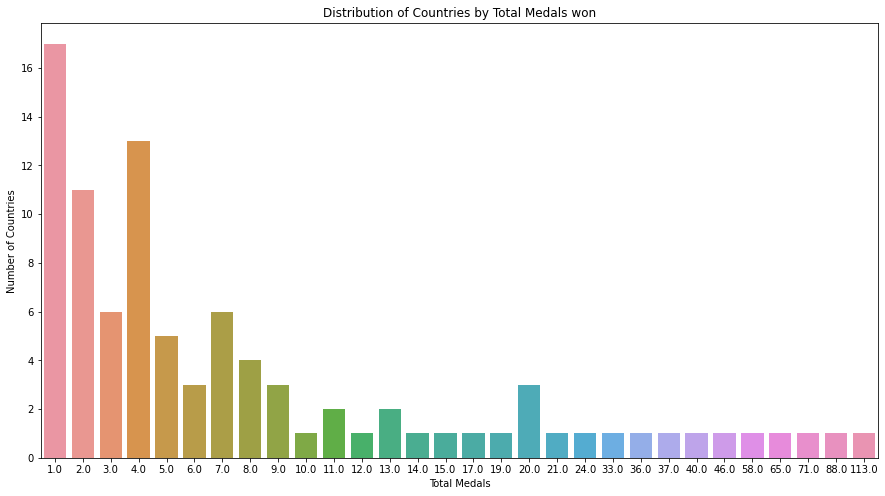

In [177]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=medal_total_distribution,x=medal_total_distribution.index,y='NOC')
ax.set(xlabel='Total Medals', ylabel='Number of Countries')
ax.set_title(label='Distribution of Countries by Total Medals won')

* **The plot above shows, of the 93 countries that won at least one medal, the majority of countries won less than 10 total medals.**
* **At the left end of the plot, 17 countries won only one medal.**
* **At the right end of the plot, one country won 113 medals.**

**Below, make new dataframe 'Athlete_Count_distribution' to explore the distribution of countries by Athlete Count using reset_index() and pivot_table()**

In [178]:
Athlete_Count_distribution=tokyo_olympics_ath_count_medal['Athlete Count'].reset_index().pivot_table(index='Athlete Count', aggfunc=lambda x: x.nunique())

**Check the first five rows of 'Athlete_Count_distribution'**

In [179]:
Athlete_Count_distribution.head()

,NOC
Athlete Count,
2,17
3,19
4,15
5,18
6,12


**Use 'Athlete_Count_distribution' dataframe to make Barplot exploring the Distribution of Countries by Athlete Count.**

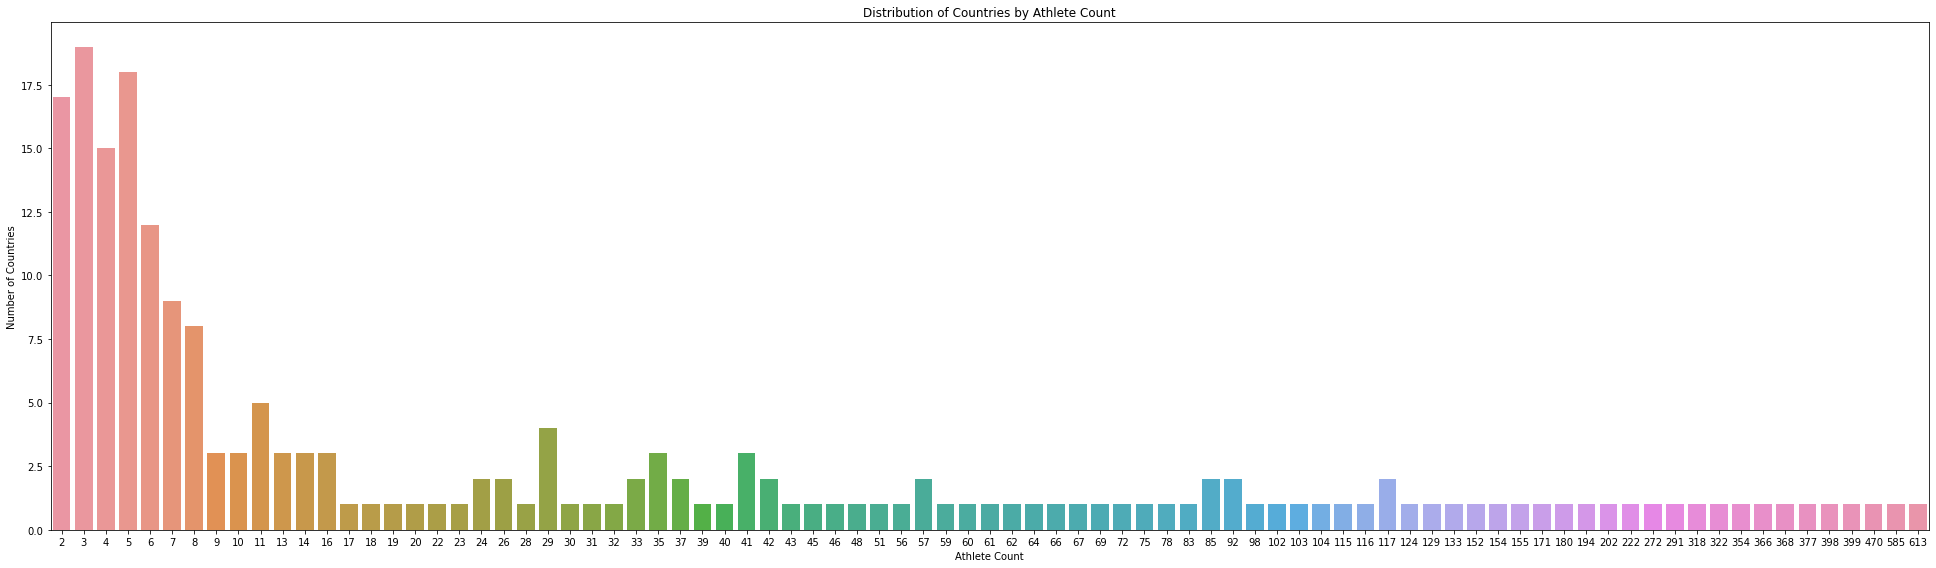

In [180]:
plt.figure(figsize=(27,8))
ax1 = sns.barplot(data=Athlete_Count_distribution,x=Athlete_Count_distribution.index,y='NOC')
ax1.set(xlabel='Athlete Count', ylabel='Number of Countries')
ax1.set_title(label='Distribution of Countries by Athlete Count')
plt.tight_layout()

* **The plot above shows of the 206 countries that participated, many countries sent less than 10 athletes.**
* **On the left end of the plot 17 countries sent just 2 athletes.**
* **On the right end of the plot one country sent 615 athletes.**

**Make barplot showing the top 10 countries with most medals.**

Text(0, 0.5, 'Number of Total Medals')

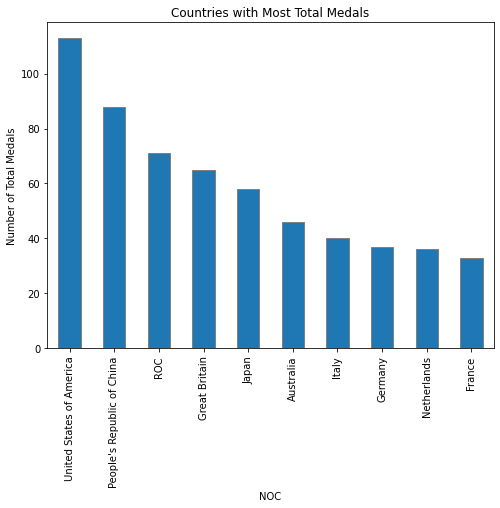

In [181]:
plt.figure(figsize=(8,6))
ax2 = tokyo_olympics_ath_count_medal['Total'].sort_values(ascending=False).head(10).plot(kind='bar',ec='gray')
ax2.set_title(label='Countries with Most Total Medals')
ax2.set_ylabel(ylabel='Number of Total Medals')

* **The plot above shows United States won the most with over a 100 total medals.**
* **France in 10th place, won less than 40 total medals.**

**Make barplot showing the top 10 countries with the most Athlete Count.**

Text(0, 0.5, 'Number of Athletes')

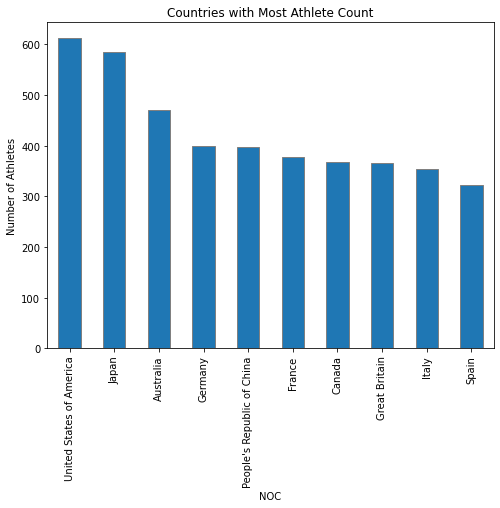

In [182]:
plt.figure(figsize=(8,6))
ax4 = tokyo_olympics_ath_count_medal['Athlete Count'].sort_values(ascending=False).head(10).plot(kind='bar',ec='gray')
ax4.set_title(label='Countries with Most Athlete Count')
ax4.set_ylabel(ylabel='Number of Athletes')

* **The plot above shows United States had the most athletes with over 600.**
* **Japan was a close second with just under 600.**

**Below, make a matrix of the correlation of Athlete Count and Medals won.**

In [183]:
tokyo_olympics_ath_count_medal.drop(['Rank','Rank by Total'],axis=1).corr(method='pearson')

,Athlete Count,Gold,Silver,Bronze,Total
Athlete Count,1.000000,0.839374,0.795548,0.890871,0.874674
Gold,0.839374,1.000000,0.929046,0.862425,0.970840
Silver,0.795548,0.929046,1.000000,0.862646,0.969439
Bronze,0.890871,0.862425,0.862646,1.000000,0.941941
Total,0.874674,0.970840,0.969439,0.941941,1.000000


**Make heatmap of the correlation of Athlete Count and Medals won.**

Text(0.5, 1.0, 'Correlation between Athlete Count and Medals won')

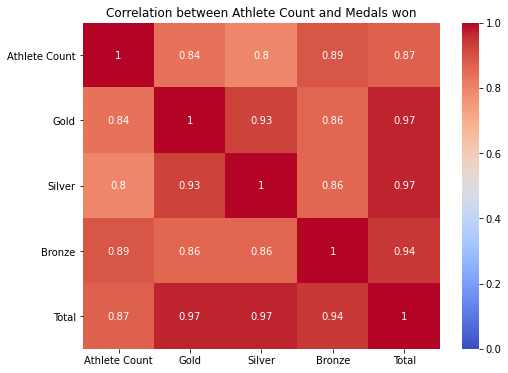

In [184]:
plt.figure(figsize=(8,6))
ax5=sns.heatmap(data=tokyo_olympics_ath_count_medal.drop(columns=['Rank','Rank by Total']).corr(method='pearson'),cmap='coolwarm',annot=True,vmin=0, vmax=1)
ax5.set_title(label='Correlation between Athlete Count and Medals won')

* **There is a correlation between the number of athletes a country sends to the Olympics and the number of medals won by the country.**

* **Athlete Count and Total Medal Pearson R = 0.87**

* **The correlation is the strongest for Bronze medals.**

* **Athlete Count and Bronze Medal Pearson R = 0.89**

## PREPARING AND CLEANING THE GDP DATA

**Now we will prepare GDP Per Capita data to get its correlation with total medals won.**

**To get GDP per capita data, read in the 'world_gdp_data.csv' csv file as a dataframe called 'gdp_pcapita'**

In [185]:
gdp_pcapita = pd.read_csv('world_gdp_data.csv')

**Check the info of the 'gdp_pcapita' dataframe.**

In [186]:
gdp_pcapita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Series Name    268 non-null    object
 1   Series Code    266 non-null    object
 2   Country Name   266 non-null    object
 3   Country Code   266 non-null    object
 4   2016 [YR2016]  266 non-null    object
 5   2017 [YR2017]  266 non-null    object
 6   2018 [YR2018]  266 non-null    object
 7   2019 [YR2019]  266 non-null    object
 8   2020 [YR2020]  266 non-null    object
dtypes: object(9)
memory usage: 19.2+ KB


**Check the first 5 rows of the dataframe.**

In [187]:
gdp_pcapita.head(5)

,Series Name,Series Code,Country Name,Country Code,2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,GDP per capita (current US$),NY.GDP.PCAP.CD,Afghanistan,AFG,509.220100485356,519.888912573073,493.756581366026,507.103391875763,508.808409485223
1,GDP per capita (current US$),NY.GDP.PCAP.CD,Albania,ALB,4124.05572595352,4531.02080555986,5284.38018438156,5355.84779459031,5215.27675237003
2,GDP per capita (current US$),NY.GDP.PCAP.CD,Algeria,DZA,3946.45242459305,4109.70344220826,4153.95623446741,3975.5089933335,3310.38653352368
3,GDP per capita (current US$),NY.GDP.PCAP.CD,American Samoa,ASM,12038.2496994923,11003.8297642807,11557.671156308,11534.5675441134,..
4,GDP per capita (current US$),NY.GDP.PCAP.CD,Andorra,AND,37475.6350587526,38964.904478265,41791.9698372411,40897.3308728669,..


**Check if any columns have any null values.**

**All columns have null values. 
In this exploration, we will only use the "2020 [YR2020]" column. We will clean the cells once we join it with the 'tokyo_olympics_ath_count_medal' dataframe.**

In [188]:
gdp_pcapita.isnull().any()

Series Name      True
Series Code      True
Country Name     True
Country Code     True
2016 [YR2016]    True
2017 [YR2017]    True
2018 [YR2018]    True
2019 [YR2019]    True
2020 [YR2020]    True
dtype: bool

**All columns have null values. 
In this exploration, we will only use the "2020 [YR2020]" column. We will clean the cells once we join it with the 'tokyo_olympics_ath_count_medal' dataframe.**

**Below, change 'gdp_pcapita' index to country name.**

In [189]:
gdp_pcapita = gdp_pcapita.set_index('Country Name')

**Find country names in 'gdp_pcapita' index which are different from country names in
'tokyo_olympics_ath_count_medal' index using difference(). We will need to match the country names in 'gdp_pcapita' to the ones in 'tokyo_olympics_ath_count_medal' to join the two dataframes**

In [190]:
idx1 = tokyo_olympics_ath_count_medal.index
idx2 = gdp_pcapita.index

In [191]:
idx1.difference(idx2)

Index(['Bahamas', 'Cape Verde', 'Chinese Taipei', 'Congo', 'Cook Islands',
       'Côte d'Ivoire', 'Democratic Republic of Timor-Leste',
       'Democratic Republic of the Congo', 'Egypt',
       'Federated States of Micronesia', 'Gambia', 'Great Britain',
       'Hong Kong, China', 'Islamic Republic of Iran', 'Kyrgyzstan',
       'Lao People's Democratic Republic', 'Palestine',
       'People's Republic of China', 'ROC', 'Refugee Olympic Team',
       'Republic of Korea', 'Republic of Moldova', 'Saint Kitts and Nevis',
       'Saint Lucia', 'Slovakia', 'St Vincent and the Grenadines',
       'United Republic of Tanzania', 'United States of America', 'Venezuela',
       'Virgin Islands, British', 'Virgin Islands, US', 'Yemen'],
      dtype='object')

**Make dictionary to match the country names in 'gdp_pcapita' index to the names in 'tokyo_olympics_ath_count_medal'.**

**"Chinese Taipei" and "Cuba" do not exist in the 'gdp_pcapita' dataframe.**

In [192]:
world_bank_to_oly_index = {"Bahamas, The":"Bahamas", "Cabo Verde":"Cape Verde", "Congo, Rep.":"Congo", "Pacific Islands":"Cook Islands", "Cote d'Ivoire":"Côte d'Ivoire", "Timor-Leste":"Democratic Republic of Timor-Leste","Congo, Dem. Rep.":"Democratic Republic of the Congo", "Egypt, Arab Rep.":"Egypt","Micronesia, Fed. Sts.":"Federated States of Micronesia", "Gambia, The":"Gambia", "United Kingdom":"Great Britain","Hong Kong SAR, China":"Hong Kong, China", "Iran, Islamic Rep.":"Islamic Republic of Iran", "Kyrgyz Republic":"Kyrgyzstan","Lao PDR":"Lao People's Democratic Republic", "West Bank and Gaza":"Palestine","China":"People's Republic of China","Russian Federation":"ROC","Korea, Rep.":"Republic of Korea", "Moldova":"Republic of Moldova","St. Kitts and Nevis":"Saint Kitts and Nevis","St. Lucia":"Saint Lucia","Slovak Republic":"Slovakia", "St. Vincent and the Grenadines":"St Vincent and the Grenadines","Tanzania":"United Republic of Tanzania", "United States":"United States of America", "Venezuela, RB":"Venezuela", "Virgin Islands (U.S.)":"Virgin Islands, US", "Yemen, Rep.":"Yemen"}

**Rename 'gdp_pcapita' index to match 'tokyo_olympics_ath_count_medal' with rename()**

In [193]:
gdp_pcapita.rename(index = world_bank_to_oly_index, inplace=True)

**Left join 'tokyo_olympics_ath_count_medal' dataframe with 'gdp_pcapita' on the 'NOC' column using join().**

**Make new dataframe called 'tokyo_olympics_medal_gdp'.**

In [194]:
tokyo_olympics_medal_gdp=tokyo_olympics_ath_count_medal.join(gdp_pcapita["2020 [YR2020]"], on='NOC')

**Check the info of the 'tokyo_olympics_medal_gdp' dataframe.**

In [195]:
tokyo_olympics_medal_gdp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, Afghanistan to Zimbabwe
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Athlete Count  206 non-null    int64  
 1   Rank           93 non-null     float64
 2   Gold           93 non-null     float64
 3   Silver         93 non-null     float64
 4   Bronze         93 non-null     float64
 5   Total          93 non-null     float64
 6   Rank by Total  93 non-null     float64
 7   2020 [YR2020]  202 non-null    object 
dtypes: float64(6), int64(1), object(1)
memory usage: 22.6+ KB


**Change '2020 [YR2020]' column datatype from 'object' to 'float' with pd.to_numeric() and round the numbers with round()**

In [196]:
tokyo_olympics_medal_gdp["2020 [YR2020]"]=pd.to_numeric(tokyo_olympics_medal_gdp["2020 [YR2020]"],errors='coerce').round(0)

**Check the first five rows of the 'tokyo_olympics_medal_gdp' dataframe.**

In [197]:
tokyo_olympics_medal_gdp.head()

,Athlete Count,Rank,Gold,Silver,Bronze,Total,Rank by Total,2020 [YR2020]
NOC,,,,,,,,
Afghanistan,5,NaN,NaN,NaN,NaN,NaN,NaN,509.0
Albania,8,NaN,NaN,NaN,NaN,NaN,NaN,5215.0
Algeria,41,NaN,NaN,NaN,NaN,NaN,NaN,3310.0
American Samoa,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**There are null values but since we are only going to check the values the top 30 total medal 
countries, we will leave them as is.**

**Below, filter 'tokyo_olympics_medal_gdp' dataframe to show only top 30 total medal winning countries with sort_values()**

In [198]:
tokyo_olympics_medal_gdp.sort_values(by='Total',ascending=False).head(30)

,Athlete Count,Rank,Gold,Silver,Bronze,Total,Rank by Total,2020 [YR2020]
NOC,,,,,,,,
United States of America,613,1.0,39.0,41.0,33.0,113.0,1.0,63544.0
People's Republic of China,398,2.0,38.0,32.0,18.0,88.0,2.0,10500.0
ROC,318,5.0,20.0,28.0,23.0,71.0,3.0,10127.0
Great Britain,366,4.0,22.0,21.0,22.0,65.0,4.0,40285.0
Japan,585,3.0,27.0,14.0,17.0,58.0,5.0,NaN
Australia,470,6.0,17.0,7.0,22.0,46.0,6.0,51812.0
Italy,354,10.0,10.0,10.0,20.0,40.0,7.0,31676.0
Germany,399,9.0,10.0,11.0,16.0,37.0,8.0,45724.0
Netherlands,272,7.0,10.0,12.0,14.0,36.0,9.0,52304.0


**In the filtered dataframe above, one can see 'Kazakhstan' and 'Norway' both have
8 total medals.**

**In case there were other countries with 8 total medals, we will revise
the filter to include all countries which won 8 total medals or more below.**

In [199]:
tokyo_olympics_medal_gdp[tokyo_olympics_medal_gdp['Total']>=8]

,Athlete Count,Rank,Gold,Silver,Bronze,Total,Rank by Total,2020 [YR2020]
NOC,,,,,,,,
Australia,470,6.0,17.0,7.0,22.0,46.0,6.0,51812.0
Brazil,291,12.0,7.0,6.0,8.0,21.0,12.0,6797.0
Canada,368,11.0,7.0,6.0,11.0,24.0,11.0,43242.0
Chinese Taipei,67,34.0,2.0,4.0,6.0,12.0,22.0,NaN
Croatia,57,26.0,3.0,3.0,2.0,8.0,29.0,13828.0
Cuba,69,14.0,7.0,3.0,5.0,15.0,18.0,NaN
Czech Republic,117,18.0,4.0,4.0,3.0,11.0,23.0,22762.0
Denmark,103,25.0,3.0,4.0,4.0,11.0,23.0,60909.0
France,377,8.0,10.0,12.0,11.0,33.0,10.0,38625.0


**In the dataframe above, there are null values for index 'Japan','Chinese Taipei','Cuba' on column '2020 [YR2020]'(which represents GDP per capita in 2020).**


**Below, for index 'Japan', fill in the null values with Japan's 2019 GDP per capita data from the 'gdp_pcapita' dataframe.**


**For index 'Chinese Taipei' and 'Cuba' fill in the null values with information found in the CIA World Factbook page as there were no entries for them in the 'gdp_pcapita' dataframe. Note that 'Chinese Taipei' referenced as 'Taiwan' in the CIA World Factbook.**

https://www.cia.gov/the-world-factbook/field/real-gdp-per-capita/country-comparison 

**Use fillna() function.**

In [200]:
gdp_values={"Chinese Taipei":24502,"Cuba":12300,"Japan":40113}
tokyo_olympics_medal_gdp["2020 [YR2020]"].fillna(value=gdp_values,axis=0,inplace=True)

**Below, make regression plot showing the relation between GDP Per Capita in 2020 and Total Medals won in Tokyo 2021.**

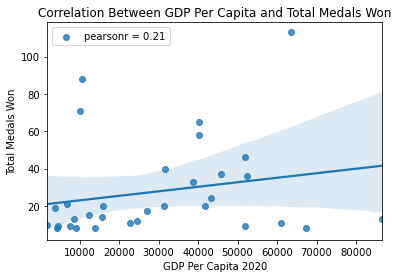

In [201]:
from scipy.stats import pearsonr
plt.figure(figsize=(6,4))
r, pvalue = pearsonr(tokyo_olympics_medal_gdp[tokyo_olympics_medal_gdp['Total']>=8]["2020 [YR2020]"], tokyo_olympics_medal_gdp[tokyo_olympics_medal_gdp['Total']>=8]["Total"])
ax6=sns.regplot(data=tokyo_olympics_medal_gdp[tokyo_olympics_medal_gdp['Total']>=8], x="2020 [YR2020]", y="Total", label=f'pearsonr = {r:.2f}')
ax6.set(title='Correlation Between GDP Per Capita and Total Medals Won',xlabel='GDP Per Capita 2020', ylabel='Total Medals Won')
plt.legend()

* **The plot above shows a very low correlation between GDP Per Capita and Total Medals Won.**
* **Pearson R = 0.21**

**Below make regression plot showing the relation between GDP Per Capita in 2020 and Athlete Count in Tokyo 2021.**

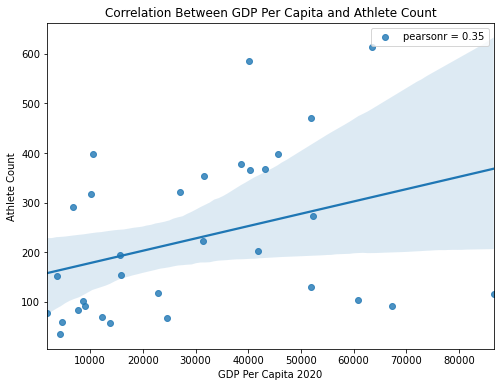

In [202]:
from scipy.stats import pearsonr
r, pvalue = pearsonr(tokyo_olympics_medal_gdp[tokyo_olympics_medal_gdp['Total']>=8]["2020 [YR2020]"], tokyo_olympics_medal_gdp[tokyo_olympics_medal_gdp['Total']>=8]["Athlete Count"])
plt.figure(figsize=(8,6))
ax7 = sns.regplot(data=tokyo_olympics_medal_gdp[tokyo_olympics_medal_gdp['Total']>=8], x="2020 [YR2020]", y="Athlete Count", label=f'pearsonr = {r:.2f}')
ax7.set(title='Correlation Between GDP Per Capita and Athlete Count', xlabel= 'GDP Per Capita 2020')
plt.legend()

* **The plot above shows a low correlation between GDP Per Capita and Athlete Count.**
* **Pearson R = 0.35**

## CONCLUSION

* **United States of America, People's Republic of China and ROC(Russia) won the most Medals in Tokyo 2021.**
* **United States of America, Japan and Australia sent the most Athletes to Tokyo 2021.**
* **There is a strong correlation between Athlete Count and the Total Medals a Country wins. Pearson R = 0.87**
* **There is a low correlation between GDP Per Capita and the Total Medals a Country wins.
Pearson R = 0.21. 
This makes sense as People's Republic of China and ROC(Russia) are amongst top 3 medal winners but have relatively low GDP per capita.**
